Welcome to JupyROOT 6.30/07


Warning in <Fit>: Abnormal termination of minimization.
Info in <TCanvas::MakeDefCanvas>:  created default TCanvas with name c1
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


****************************************
         Invalid FitResult  (status = 2 )
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      60.4411
NDf                       =           54
Edm                       =  1.47042e-18
NCalls                    =          102
bg_const                  =    -0.896424   +/-   0           
bg_linear                 =      45.0577   +/-   0           
Fit Status: 2
bg_quad                   =     -13.0281   +/-   0           
peak_amp                  =      14.8596   +/-   0           
p4                        =            1   +/-   0           
p5                        =            1   +/-   0           
Chi2/NDF: 1.119279413097717
bg_const: -0.896 ± 0.000
bg_linear: 45.058 ± 0.000
bg_quad: -13.028 ± 0.000
peak_amp: 14.860 ± 0.000
p4: 1.000 ± 0.000
p5: 1.000 ± 0.000


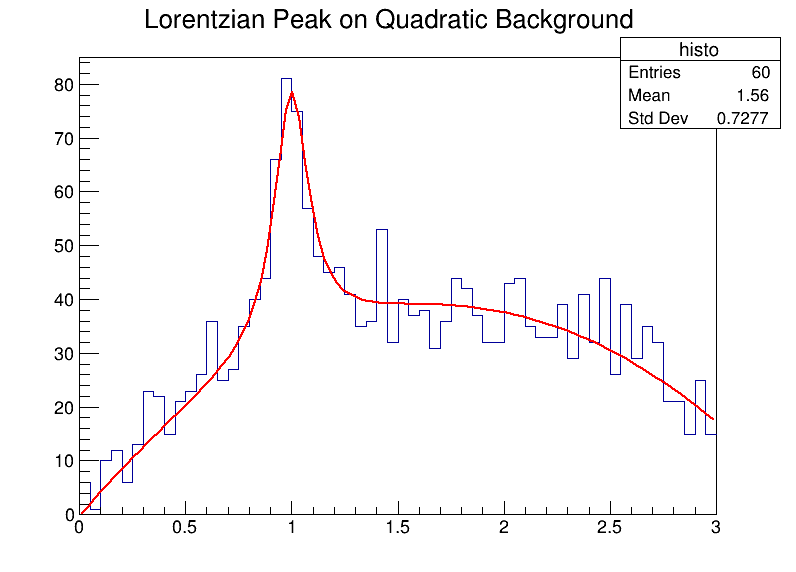

In [1]:
import ROOT

data = [ 6,1,10,12,6,13,23,22,15,21,
         23,26,36,25,27,35,40,44,66,81,
         75,57,48,45,46,41,35,36,53,32,
         40,37,38,31,36,44,42,37,32,32,
         43,44,35,33,33,39,29,41,32,44,
         26,39,29,35,32,21,21,15,25,15 ]

title = 'Lorentzian Peak on Quadratic Background'
h = ROOT.TH1F('histo', title, nbinsx=60, xlow=0, xup=3)

for i, x in enumerate(data):
   h.SetBinContent(i+1, x) # bin 0 is the underflow bin!
ROOT.gInterpreter.Declare("""
double background(double *x, double *par) {
  return par[0] + par[1]*x[0] + par[2]*x[0]*x[0];
}

double lorentzianPeak(double *x, double *par) {
  return (0.5*par[0]*0.2/TMath::Pi())
         / TMath::Max(1.e-10, (x[0] - 1.)*(x[0] - 1.) + .25*0.04);
}

double fitFunction(double *x, double *par) {
  return background(x, par) + lorentzianPeak(x, &par[3]);
}
""")
fit = ROOT.TF1("fit", ROOT.fitFunction, 0, 3, 6)
fit.SetParName(0, "bg_const")
fit.SetParName(1, "bg_linear") 
fit.SetParName(2, "bg_quad")
fit.SetParName(3, "peak_amp")

# Set initial parameter guesses
fit.SetParameters(10, -10, 10, 60, 1, 1)

# Fit the histogram
result = h.Fit(fit, "S")

# Print results
print("Fit Status:", result.Status())
print("Chi2/NDF:", fit.GetChisquare()/fit.GetNDF())

# Print parameters
for i in range(6):
    print(f"{fit.GetParName(i)}: {fit.GetParameter(i):.3f} ± {fit.GetParError(i):.3f}")
# Draw the histogram and fit
c1 = ROOT.TCanvas("c1", "Fit Result", 800, 600)
h.Draw()
fit.Draw("same")
c1.Draw()